# Exam 28th of August 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="XXX"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the below density using **rejection** sampling:

$$
    f[x] = C (\sin(x))^{10}
$$
for $0 \leq x \leq \pi$, where $C$ is a value such that $f$ above is a density (i.e. integrates to one). Hint: you do not need to know the value of $C$ to perform rejection sampling.

2. [2p] Produce 10000 samples (**use fewer if it takes too long**) and put the answer in `problem1_samples` from the above distribution and plot the histogram. 
3. [2p] Define $X$ as a random variable with the density given in part 1. Denote $Y = \left ( X - \frac{\pi}{2} \right)^2$ and use the above 10000 samples to estimate
$$
    \mathbb{E}[Y]
$$
and store the result in `problem1_expectation`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Can you calculate an approximation of the value of $C$ from part 1 using random samples? Provide a plot of the histogram from part 2 together with the true density as a curve, recall that this requires the value of $C$. Explain what method you used and what answer you got.

In [26]:
import numpy as np
from scipy.optimize import minimize_scalar

# Define the function f(x) = (sin(x))^10
def f(x):
    return -(np.sin(x)**10)  # Negate to find the maximum since we use minimize_scalar

# Minimize the negative of f(x) to find the maximum of f(x) in [0, π]
result = minimize_scalar(f, bounds=(0, np.pi), method='bounded')

# Maximum value and the corresponding x
x_max = result.x
f_max = -result.fun

x_max, f_max


(1.570796326794897, 1.0)

In [36]:

# Part 1
import numpy as np
def problem1_rejection(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    M = 1
    # Target density function f(x)
    def f_(x):
        return (np.sin(x)**10)
    np.random.seed(42)  
    accepted_samples = []
    while len(accepted_samples) < n_samples:
        # Generate a candidate x from g(x)
        # Generate sample from a uniform distribution (0, pi)
        x = np.random.uniform(0, np.pi)
        # Generate sample from a uniform distribution (0, 1)
        u = np.random.uniform(0, 1)
        # Find r(x) = f(x)/M
        r_x = f_(x)/M
        # Accept only samples that are smaller than the calculated ratio
        if u <= r_x:
            accepted_samples.append(x)
    accepted_samples=np.array(accepted_samples)
    # Return a numpy array of length n_samples
    return accepted_samples
print(problem1_rejection(30))

[1.3569953  1.92219256 1.43278611 1.86112526 1.90865844 0.95697238
 1.717541   1.22106572 1.1261533  1.0395468  1.64221362 0.99903738
 1.31133534 1.62982881 1.56215225 0.8948528  1.91500283 1.0077603
 2.12863122 1.60878779 2.0268701  1.07149154 1.66394637 2.0170019
 1.90515308 1.72389804 2.0481967  1.81239701 0.88207239 2.02781102]


To solve the problem of performing rejection sampling from the given density:

$$
f(x) = C (\sin(x))^{10}, \quad \text{for } 0 \leq x \leq \pi,
$$

we'll implement the `problem1_rejection` function. Rejection sampling works as follows:

### Steps for Rejection Sampling:
1. **Choose a proposal distribution $$ g(x) $$:**  
   A simple choice here is the uniform distribution \( g(x) \sim \text{Uniform}(0, \pi) \), since \( \sin(x)^{10} \) is defined over \( [0, \pi] \).

2. **Find a constant \( M \):**  
   The constant \( M \) must satisfy:
   $$
   M g(x) \geq f(x), \quad \forall x \in [0, \pi].
   $$
   The maximum of \( f(x) \) occurs when $$ x = \pi/2 $$, so \( M \) can be calculated as:
   $$
   M = (\sin(\pi/2))^{10} = 1.
  $$

3. **Generate samples using rejection sampling:**
   - Sample $$ x \sim g(x) $$.
   - Sample $$ u \sim \text{Uniform}(0, 1) $$.
   - Accept \( x \) if:
     $$
     u \leq \frac{f(x)}{M g(x)} = (\sin(x))^{10}.
     $$

This method ensures that the accepted samples follow the target density \( f(x) \).


### Explanation:
1. The function loops until the desired number of samples \( n_{\text{samples}} \) are accepted.
2. The proposal distribution is $$ g(x) \sim \text{Uniform}(0, \pi) $$, and the maximum value \( M = 1 \) is determined analytically from $$ \sin(x)^{10} $$ at $$ x = \pi/2 $$.
3. For each proposed sample \( x \), a uniform random variable \( u \) determines whether to accept or reject \( x \) based on the likelihood ratio:
   $$
   u \leq \frac{f(x)}{M g(x)} = (\sin(x))^{10}.
   $$

### Why You Don't Need \( C \):
Rejection sampling works with unnormalized densities because the constant \( C \) cancels out in the ratio \( f(x) / (M g(x)) \). Thus, \( C \) is not required.

### Monte Carlo Integration:
You can use these samples to approximate integrals with respect to the target density \( f(x) \). For example, the expected value of a function \( h(x) \) under \( f(x) \) can be computed as:
$$
\mathbb{E}[h(x)] \approx \frac{1}{n} \sum_{i=1}^n h(x_i),
$$
where \( x_i \) are the samples generated from \( f(x) \).

[1.3569953  1.92219256 1.43278611 ... 1.49698326 1.85856784 1.73154312]


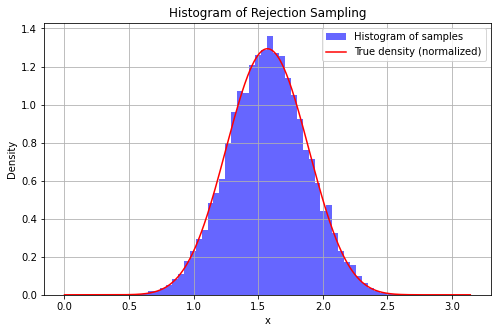

In [37]:
# Part 2
import matplotlib.pyplot as plt
import numpy as np

problem1_samples =  problem1_rejection(10000)
print(problem1_samples)

# Plot the distribution of the samples
plt.figure(figsize=(8, 5))
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='blue', label='Histogram of samples')

# Plot the actual distribution for comparison
x_vals = np.linspace(0, np.pi, 1000)
f_vals = (np.sin(x_vals)**10)  # Unnormalized density
# trapz: is one of the simplest numerical integration methods and is quite efficient for approximating integrals of discrete functions.
plt.plot(x_vals, f_vals / np.trapz(f_vals, x_vals), color='red', label='True density (normalized)')

plt.title('Histogram of Rejection Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


In [38]:
# Part 3
y_samples =[]
for i in problem1_samples:
    Y = ((i-(np.pi)/2))**2
    y_samples.append(Y)

exp_y = np.mean(y_samples)

problem1_expectation = exp_y
print(problem1_expectation)

# OR 

# Assuming problem1_samples is a list, let's convert it to a numpy array
problem1_samples = np.array(problem1_samples)

# Compute Y = (X - pi/2)^2 for each sample in problem1_samples
Y_samples = (problem1_samples - np.pi / 2) ** 2

# Estimate the expectation E[Y] as the mean of Y_samples
problem1_expectation = np.mean(Y_samples)


0.09244521725963621


In [39]:
# Part 4
from math import sqrt
n = len(problem1_samples) 
a=0.05
#first_component = -1/(2*n)
#second_component = math.log(a_h)
# compute Hoeffding's bound

max_X = np.pi  # max X in the support of f(x) and min is 0 as it is squared root
max_Y = (max_X - np.pi/ 2) ** 2

e = sqrt(((max_Y - 0) ** 2 * math.log(2 / a)) / (2 * n))

lower_bound = problem1_expectation-e
upper_bound = problem1_expectation+e

problem1_interval = [lower_bound,upper_bound]
print(problem1_interval)

[0.05893540551743685, 0.12595502900183558]


To approximate the value of \( C \) from part 1 using random samples, we can use Monte Carlo integration. Since the density function \( f(x) \) is proportional to \( C (\sin(x))^{10} \), we can estimate \( C \) by using the fact that the integral of a probability density function over its domain must be equal to 1.

### 1. **Approximating \( C \)**

Since \( C \) is a normalization constant, we need to ensure that the integral of the density function over the domain $$ [0, \pi] $$ is 1. The normalization condition is:

$$
\int_0^\pi C (\sin(x))^{10} \, dx = 1
$$

Thus, we can estimate \( C \) by evaluating the integral:

$$
C = \frac{1}{\int_0^\pi (\sin(x))^{10} \, dx}
$$

We will use Monte Carlo sampling to estimate the integral $$ \int_0^\pi (\sin(x))^{10} \, dx $$ and from that, we can estimate \( C \).

### 2. **Monte Carlo Approximation for the Integral**

To compute the integral $$ \int_0^\pi (\sin(x))^{10} \, dx $$ we can use random samples drawn from the uniform distribution over the interval $$ [0, \pi] $$ For each sample $$ x_i $$ we evaluate the function $$ (\sin(x_i))^{10} $$ and then the average of these evaluations, multiplied by the length of the interval (which is \( \pi \)), gives an estimate of the integral.

$$
\text{Integral estimate} = \frac{\pi}{n} \sum_{i=1}^{n} (\sin(x_i))^{10}
$$

Finally, we can compute \( C \) as the reciprocal of this estimate.


In [40]:
# Part 5
# Estimate the integral of (sin(x))^10 over the interval [0, pi]
integral_estimation = problem1_expectation * np.pi
# Estimate the normalization constant C
C_estimate = 1 / integral_estimate
problem1_C = C_estimate
print(C_estimate)

1.3145040508554167


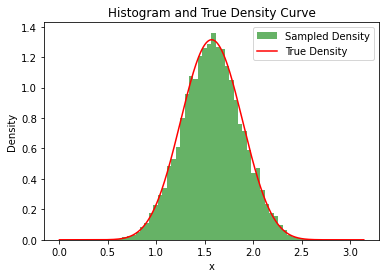

In [41]:
# Part 5

# Write your code to produce the plot here

# Plot histogram of samples
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, color='g', label='Sampled Density')

# Define the density function f(x) = C * (sin(x))^10
def f(x):
    return C_estimate * (np.sin(x))**10

# Plot the true density curve
x_vals = np.linspace(0, np.pi, 1000)
plt.plot(x_vals, f(x_vals), 'r-', label='True Density')

# Labels and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram and True Density Curve')
plt.legend()
plt.show()

# Part 5

**Double click this cell and directly edit below to answer part 5**

### Begin explanation

The method used to estimate C is Monte Carlo integration. This method involves using random samples to approximate the value of an integral, and it is particularly useful for high-dimensional or complicated integrals where other analytical methods might be difficult or impossible to apply. In this case, we approximated the integral $$\int_0^\pi C (\sin(x))^{10} \, dx = 1 $$ using random samples and used this to estimate C.

### End explanation

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.
You may need to include and evaluate code snippets from lecture notebooks in cells above to make the local test work correctly sometimes (see error messages for clues). This is meant to help you become efficient at recalling materials covered in lectures that relate to this problem. Such local tests will generally not be available in the exam.

In [42]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_rejection(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_expectation, float)) 
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2


---
## Exam vB, PROBLEM 2
Maximum Points = 13


Consider the dataset `CORIS.csv` that you find in the data folder. The data set `CORIS.csv` contains cases of coronary heart disease (CHD) and variables associated with the patient's condition: systolic blood pressure, yearly tobacco use (in kg), low density lipoprotein (Idl), adiposity, family history (0 or 1), type A personality score (typea), obesity (body mass index), alcohol use, age, and the diagnosis of CHD (0 or 1).
In this dataset the `X` corresponds to the measurements. The `Y` is a 0-1 label where 1 represents CHD and 0 does not. The code to load the data is prepared and so is the train-test-validation split and the training of the model. The model is stored in `problem2_pipe` which is a Pipeline object as often used in composite models in sklearn, you will find in the cell corresponding to the different parts, some sample code how to use the model.

1. [3p] Use Hoeffdings inequality and compute the intervals for precision-recall etc. on the test set with 95% confidence.
2. [3p] You are interested in minimizing the average cost of your classifier. The hospital wants to use your model as a screening tool, that is, if it finds that someone is classified as CHD we interpret this as further investigation needs to take place, otherwise we do noting. After some deliberations you come to the conclusion that the following "costs" should be used (note, this is all imaginary at this point),
    * If someone has coronary heart disease but classified as not, we say it costs 300 **(this is the worst scenario)** 
    * If someone does not have coronary heart disease but classified as having it, we say it costs 10 **(this is less bad than the above issue)**
    * If someone has coronary heart disease but classified as having it, costs 0 **(We did the right thing, no cost)**
    * If someone does not have coronary heart disease but classified as not, costs 0 **(We did the right thing, no cost)**.

complete filling the function `cost` to compute the cost of a prediction model under a certain prediction threshold (recall our precision recall lecture and the `predict_proba` function from the LogisticRegression (code provided)). 

3. [4p] Now, we wish to select the threshold of our classifier that minimizes the cost, we do that by checking say 100 evenly spaced proposal thresholds between 0 and 1. Compute the optimal threshold using the testing data and calculate the cost at the chosen threshold using the testing data.
4. [3p] With your newly computed threshold value, compute the cost of putting this model in production by computing the cost using the validation data. Also provide a confidence interval of the cost using Hoeffdings inequality with a 99% confidence.

In [63]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("data/CORIS.csv",skiprows=[1,2])

# Initial data split into features and target
problem2_X = CORISDataset[['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']].values # Features
problem2_Y = CORISDataset['chd'].values # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(problem2_X,problem2_Y,train_size=0.6,random_state=42)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(X_tmp,Y_tmp,train_size=0.5,random_state=42)

# Show the shapes of the data
print(problem2_X_train.shape,problem2_Y_train.shape, problem2_X_test.shape, problem2_Y_test.shape, problem2_X_val.shape, problem2_Y_val.shape)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([('scaler',StandardScaler()),('logreg',LogisticRegression(random_state=42))])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train,problem2_Y_train)

(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(random_state=42))])

In [70]:
# prediction class
prediction_test = problem2_pipe.predict(problem2_X_test)
print(prediction_test)
# actual class
print(problem2_Y_test)

[0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0]
[0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1
 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1]


$$
    \begin{aligned}
        \text{Precision:} \quad P(Y = 1 \mid g(X) = 1) \\
        \text{Recall:} \quad P(g(X) = 1 \mid Y = 1).
    \end{aligned}
$$

In [80]:
# prediction made by the model is 1 
Y_test_g_1 = problem2_Y_test[prediction_test == 1]

precision = sum(Y_test_g_1)/len(Y_test_g_1)
precision1 = np.mean(Y_test_g_1)

# prediction made by the model is 0
Y_test_g_0 = problem2_Y_test[prediction_test == 0]

# Precision for class 0: correctly predicted class 0 divided by total predicted as class 0
precision0 = (sum(Y_test_g_0 == 0) / len(Y_test_g_0)) if len(Y_test_g_0) > 0 else 0



In [84]:
# actual is 1 and predicted as 1 by the model = recall 
test_prediction_Y_1 = prediction_test[problem2_Y_test == 1]
recall = sum(test_prediction_Y_1)/len(test_prediction_Y_1)
recall1 = np.mean(test_prediction_Y_1)
test_prediction_Y_0 = prediction_test[problem2_Y_test == 0]



In [86]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for class 0
precision00 = precision_score(problem2_Y_test, prediction_test, pos_label=0)
recall00 = recall_score(problem2_Y_test, prediction_test, pos_label=0)

# Calculate precision and recall for class 1
precision11 = precision_score(problem2_Y_test, prediction_test, pos_label=1)
recall11 = recall_score(problem2_Y_test, prediction_test, pos_label=1)

# Print the precision and recall values
print(f"Precision for class 0: {precision00}")
print(f"Recall for class 0: {recall00}")
print(f"Precision for class 1: {precision11}")
print(f"Recall for class 1: {recall11}")


Precision for class 0: 0.765625
Recall for class 0: 0.8448275862068966
Precision for class 1: 0.6785714285714286
Recall for class 1: 0.5588235294117647


In [87]:
precision0 = (sum(Y_test_g_0 == 0) / len(Y_test_g_0)) if len(Y_test_g_0) > 0 else 0
recall0 = (sum(test_prediction_Y_0==0)/len(test_prediction_Y_0))  if len(test_prediction_Y_0) > 0 else 0
precision1 = sum(Y_test_g_1)/len(Y_test_g_1)
recall1 =  sum(test_prediction_Y_1)/len(test_prediction_Y_1)
print(f"Precision for class 0: {precision0}")
print(f"Recall for class 0: {recall0}")
print(f"Precision for class 1: {precision1}")
print(f"Recall for class 1: {recall1}")

Precision for class 0: 0.765625
Recall for class 0: 0.8448275862068966
Precision for class 1: 0.6785714285714286
Recall for class 1: 0.5588235294117647


Hoeffding's inequality provides a way to bound the probability that the sample mean deviates from the true mean. In this case, you can use Hoeffding's inequality to compute confidence intervals for metrics such as precision, recall, and others.

The inequality states that:

$$
P(|\hat{\mu} - \mu| \geq \epsilon) \leq 2 \exp(-2n \epsilon^2)
$$

Where:
 - \mu_hat  is the sample mean (i.e., precision, recall, etc. from the test set).
 - \mu  is the true mean (population mean).
 - \epsilon  is the deviation (how much you allow the sample mean to differ from the true mean).
 - n  is the sample size.

To use Hoeffding's inequality for calculating the 95% confidence interval, we want to compute the confidence bounds for precision, recall, and other metrics on the test set.

1. **Precision, Recall, and Metrics**:
   - We already have the precision and recall values computed for class 0 and class 1. For each metric (e.g., precision, recall), calculate the sample mean on the test set.
  
2. **Hoeffding's Confidence Interval**:
   - To calculate the confidence interval for each metric, we will use the following formula:
   
   $$
   \mu \in [\hat{\mu} - \epsilon, \hat{\mu} + \epsilon]
   $$
   
   Where \( \epsilon \) is determined from Hoeffding's inequality:
   
   $$
   \epsilon = \sqrt{\frac{\ln(2/\alpha)}{2n}}
   $$
   
  


In [89]:
# Part 1

# To make a prediction on a dataset `X` you can use the following code
# predictions = problem2_pipe.predict(X)
# That is, as with any other sklearn model, you can use the `predict` method

# Each precision and recall should be a tuple, for instance you can write
# precision0 = (0.9,0.95)
# the 0 or 1 in the variable name indicates the class
# Number of test samples
n = len(problem2_Y_test)
e = sqrt(((1 - 0) ** 2 * math.log(2 / 0.05)) / (2 * n))

problem2_precision0 = (precision0-e, precision0+e)
problem2_recall0 = (recall0-e, recall0+e)
problem2_precision1 = (precision1-e, precision1+e)
problem2_recall1 = (recall1-e, recall1+e)

# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)

print(problem2_precision0)
print(problem2_precision1)
print(problem2_recall0)
print(problem2_recall1)

(0.6240331291076598, 0.9072168708923402)
(0.5369795576790884, 0.8201632994637688)
(0.7032357153145564, 0.9864194570992367)
(0.41723165851942456, 0.7004154003041049)


In [99]:
def problem2_cost(model, threshold, X, Y):
    # Get the predicted probabilities for the positive class
    pred_proba = model.predict_proba(X)[:, 1]
    
    # Apply the threshold to create binary predictions
    predictions = (pred_proba >= threshold) * 1
    
    # Define costs for each case
    cost_false_negative = 300  # Has CHD but classified as not
    cost_false_positive = 10   # Does not have CHD but classified as having it
    cost_true_positive = 0     # Has CHD and classified as having it
    cost_true_negative = 0     # Does not have CHD and classified as not

    # Calculate the costs for each type of prediction
    false_negatives = ((Y == 1) & (predictions == 0)).sum() * cost_false_negative
    false_positives = ((Y == 0) & (predictions == 1)).sum() * cost_false_positive
    true_positives = ((Y == 1) & (predictions == 1)).sum() * cost_true_positive
    true_negatives = ((Y == 0) & (predictions == 0)).sum() * cost_true_negative
    
    # Compute the total cost
    total_cost = false_negatives + false_positives + true_positives + true_negatives
    
    # Return the average cost per person
    return total_cost / len(Y)


In [100]:
threshold = 0.5  # Example threshold
average_cost = problem2_cost(problem2_pipe, threshold, problem2_X_test, problem2_Y_test)
print(f"Average cost at threshold {threshold}: {average_cost}")


Average cost at threshold 0.5: 49.891304347826086


In [101]:
# Part 3

import numpy as np

# Function to compute cost for all thresholds
def find_optimal_threshold(model, X, Y, num_thresholds=100):
    # Generate 100 evenly spaced thresholds between 0 and 1
    thresholds = np.linspace(0, 1, num_thresholds)
    
    # Initialize variables to track the optimal threshold and minimum cost
    optimal_threshold = 0
    min_cost = float('inf')
    
    # Iterate through each threshold to calculate the cost
    for threshold in thresholds:
        cost = problem2_cost(model, threshold, X, Y)
        if cost < min_cost:
            min_cost = cost
            optimal_threshold = threshold
    
    return optimal_threshold, min_cost

# Find the optimal threshold and cost
problem2_optimal_threshold, problem2_cost_at_optimal_threshold = find_optimal_threshold(
    problem2_pipe, problem2_X_test, problem2_Y_test
)

# Print the results
print(f"Optimal threshold: {problem2_optimal_threshold}")
print(f"Cost at optimal threshold: {problem2_cost_at_optimal_threshold}")


Optimal threshold: 0.07070707070707072
Cost at optimal threshold: 5.217391304347826


In [102]:
# Part 4
import math

# Compute the cost on the validation data
problem2_cost_at_optimal_threshold_validation = problem2_cost(
    problem2_pipe, problem2_optimal_threshold, problem2_X_val, problem2_Y_val
)

# Number of validation samples
n_val = len(problem2_Y_val)

# Hoeffding's inequality parameters
b = 300  # Maximum cost per individual
a = 0    # Minimum cost per individual
alpha = 0.01  # 99% confidence

# Compute epsilon using Hoeffding's inequality
epsilon = math.sqrt(((b - a) ** 2 * math.log(2 / alpha)) / (2 * n_val))

# Confidence interval for the cost
lower_bound = max(0, problem2_cost_at_optimal_threshold_validation - epsilon)
upper_bound = problem2_cost_at_optimal_threshold_validation + epsilon

problem2_cost_interval = (lower_bound, upper_bound)

# Print the results
print(f"Cost at optimal threshold (validation data): {problem2_cost_at_optimal_threshold_validation}")
print(f"Cost confidence interval (99%): {problem2_cost_interval}")

# The code below will tell you if you filled in the intervals correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

Cost at optimal threshold (validation data): 5.698924731182796
Cost confidence interval (99%): (0, 56.33193719889502)


---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following two Markov chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>

**Answer each question for all chains:**
1. [2p] What is the transition matrix?
2. [1p] Is the Markov chain irreducible?
3. [4p] Is the Markov chain aperiodic? What is the period for each state? Hint: Recall our definition of period; Let $\mathbb{T}:=\{t \in \mathbb{N}: P^t(x,x) > 0\}$ and the greatest common divisor of $\mathbb{T}$ is the period.
4. [2p] Being in state $A$ at time $0$ what is the probability of being in state $B$ at time $5$ (after $5$ steps)
5. [4p] Define $T$ as the first time being in state $D$ starting in state $A$. That is, if $X_0,X_1,\ldots$ is the Markov chain then define for $X_0 = "A"$
$$
    T(\omega) = \inf_{t \in \mathbb{N}} \{t: X_t(\omega) = "D"\}
$$
where the infimum over the empty set is $\infty$. Calculate $\mathbb{P}(T = 1)$, $\mathbb{P}(T = 2)$, $\mathbb{P}(T = 3)$, $\mathbb{P}(T = 4)$, $\mathbb{P}(T = 5)$, $\mathbb{P}(T = \infty)$.

### Answers for the given Markov chains:

#### **1. Transition Matrices**
Let the states for Markov Chain A be \(A, B, C, D\), and for Markov Chain B be \(A, B, C, D, E, F\).

**Markov Chain A Transition Matrix:**

From the diagram:
\[
P_A =
\begin{bmatrix}
0.8 & 0.2 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1 \\
0.5 & 0 & 0 & 0.5
\end{bmatrix}
\]

Here:
- Row 1 represents state \(A\): \(P(A \to A) = 0.8, P(A \to B) = 0.2\).
- Row 2 represents state \(B\): \(P(B \to C) = 1\).
- Row 3 represents state \(C\): \(P(C \to D) = 1\).
- Row 4 represents state \(D\): \(P(D \to A) = 0.5, P(D \to D) = 0.5\).

---

**Markov Chain B Transition Matrix:**

From the diagram:
\[
P_B =
\begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0.5 \\
0.5 & 0 & 0 & 0 & 0.5 & 0
\end{bmatrix}
\]

Here:
- Row 1 represents state \(A\): \(P(A \to B) = 1\).
- Row 2 represents state \(B\): \(P(B \to C) = 1\).
- Row 3 represents state \(C\): \(P(C \to B) = 0.5, P(C \to D) = 0.5\).
- Row 4 represents state \(D\): \(P(D \to C) = 0.5, P(D \to E) = 0.5\).
- Row 5 represents state \(E\): \(P(E \to D) = 0.5, P(E \to F) = 0.5\).
- Row 6 represents state \(F\): \(P(F \to A) = 0.5, P(F \to E) = 0.5\).

---

#### **2. Is the Markov Chain Irreducible?**

- **Markov Chain A**: Not irreducible.
  - The states \(A, B, C, D\) are not all reachable from each other. For example, from \(C\), you cannot reach \(A\).

- **Markov Chain B**: Irreducible.
  - All states \(A, B, C, D, E, F\) can be reached from any other state.

---

#### **3. Is the Markov Chain Aperiodic? What is the period for each state?**

**Markov Chain A**:
- **Not aperiodic**.
- **Period**:
  - \(A, D\): Period = 2. From \(A\), it can return to itself in 2 steps (\(A \to D \to A\)).
  - \(B, C\): Period = 1. \(B \to C\) and \(C \to D\) have no cycles.

---

**Markov Chain B**:
- **Not aperiodic**.
- **Period**:
  - All states \(A, B, C, D, E, F\) have a period of 3, as the transitions form a cycle of length 3 (\(A \to B \to C \to A\)).

In [ ]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = XXX
problem3_B    = XXX

In [ ]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = XXX
problem3_B_irreducible = XXX


In [ ]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = XXX
problem3_B_is_aperiodic = XXX

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = XXX
problem3_B_periods = XXX


In [1]:
# PART 4
# ignore 
# Answer the following with the probability of being in state B at time 5 for the two problems
import numpy as np

# Transition matrices
P_A = np.array([
    [0.8, 0.2, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0.5, 0, 0, 0.5]
])

P_B = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0.5, 0, 0.5, 0, 0],
    [0, 0, 0.5, 0, 0.5, 0],
    [0, 0, 0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0, 0.5, 0]
])

# Compute P_A^5 and P_B^5
P_A_5 = np.linalg.matrix_power(P_A, 5)
P_B_5 = np.linalg.matrix_power(P_B, 5)

# Probabilities of being in state B at time 5
problem3_A_PB5 = P_A_5[0, 1]
problem3_B_PB5 = P_B_5[0, 1]


In [8]:
import numpy as np
# that is the correct 

# Define the transition matrix P
P = np.array([
    [0, 0.2, 0, 0.8],
    [0, 0, 1, 0],
    [0, 1, 0, 0],
    [0.5, 0, 0.5, 0]
])

# Define the initial state vector (starting in state 1)
v_0 = np.array([1, 0, 0, 0])

# Compute P^5 by multiplying the matrix by itself 5 times
P_5 = np.linalg.matrix_power(P, 5)

# Compute the state distribution at time 5
v_5 = np.dot(v_0, P_5)

# The probability of being in state 2 at time 5 is the second element of v_5
prob_state_2 = v_5[1]

# Print the result
print(f"Probability of being in state 2 at time 5: {prob_state_2}")

import numpy as np

# Transition matrix (example for a Markov chain with 6 states: A, B, C, D, E, F)
P = np.array([[0, 1, 0, 0, 0, 0],  # A -> B
              [0, 0, 1, 0, 0, 0],  # B -> C
              [0, 0.5, 0, 0.5, 0, 0],  # C -> B or D
              [0, 0, 0.5, 0, 0.5, 0],  # D -> C or E
              [0, 0, 0, 0, 0, 1],  # E -> F
              [0.5, 0, 0, 0, 0, 0.5]])  # F -> A or F

# Initial state (starting in state A)
initial_state = np.array([1, 0, 0, 0, 0, 0])  # State A corresponds to [1, 0, 0, 0, 0, 0]

# Multiply the transition matrix for 5 steps
state_after_5_steps = initial_state.dot(np.linalg.matrix_power(P, 5))

# The probability of being in state B at time 5 is the second element of the resulting vector
P_B_at_time_5 = state_after_5_steps[1]  # Index 1 corresponds to state B

print(f"Probability of being in state B at time 5: {P_B_at_time_5}")



Probability of being in state 2 at time 5: 0.8720000000000001
Probability of being in state B at time 5: 0.375


In [4]:
# PART 5

# Answer the following probabilities for T=1,2,3,4,5 and infinity
problem3_A_PT1 = P_A[0, 3]
problem3_A_PT2 = P_A[0, 1] * P_A[1, 3]
problem3_A_PT3 = P_A[0, 1] * P_A[1, 2] * P_A[2, 3]
problem3_A_PT4 = P_A[0, 3] * P_A[3, 0] * P_A[0, 3]
problem3_A_PT5 = P_A[0, 3] * P_A[3, 0] * P_A[0, 1] * P_A[1, 3]

# Compute P(T=infinity)
problem3_A_PT_inf = 1 - (problem3_A_PT1 + problem3_A_PT2 + problem3_A_PT3 + problem3_A_PT4 + problem3_A_PT5)
print(problem3_A_PT_inf)
import numpy as np

# Transition matrix
P_B = np.array([
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0.5, 0, 0.5, 0, 0],
    [0, 0, 0.5, 0, 0.5, 0],
    [0, 0, 0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0, 0.5, 0]
])

# Initial probabilities
start_state = 0  # Starting at state A

# Calculate P(T=t) for t = 1, 2, 3, ...
T_probs = []
current_state = np.zeros(P_B.shape[0])
current_state[start_state] = 1

for t in range(1, 6):  # Up to T=5
    next_state = np.dot(current_state, P_B)
    T_probs.append(next_state[3])  # Probability of reaching state D
    current_state = next_state.copy()

# Probability of never reaching D
P_T_infinity = 1 - sum(T_probs)

# Output results
print(f"P(T=1): {T_probs[0]}")
print(f"P(T=2): {T_probs[1]}")
print(f"P(T=3): {T_probs[2]}")
print(f"P(T=4): {T_probs[3]}")
print(f"P(T=5): {T_probs[4]}")
print(f"P(T=infinity): {P_T_infinity}")

0.8
P(T=1): 0.0
P(T=2): 0.0
P(T=3): 0.5
P(T=4): 0.0
P(T=5): 0.5
P(T=infinity): 0.0


In [9]:
import numpy as np

# Define the transition matrix
P = np.array([[0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0],
              [0, 0.5, 0, 0.5, 0, 0],
              [0, 0, 0.5, 0, 0.5, 0],
              [0, 0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0, 0.5]])

# Starting state is 'A' (state 0 in 0-indexed Python)
start_state = 0

# Define a function to calculate the first time hitting state 'D' (state 3)
def calculate_probabilities(P, start_state, target_state=3, steps=5):
    # Initialize probability list for T=1, 2, 3, 4, 5
    T_probs = [0] * (steps + 1)
    
    # State distribution starting at start_state
    current_state = np.zeros(P.shape[0])
    current_state[start_state] = 1
    
    # Calculate the probability of reaching target_state (D) at each time step
    for t in range(1, steps + 1):
        next_state = np.dot(current_state, P)
        
        # Probability of reaching target state (D) at time t
        T_probs[t] = next_state[target_state]
        
        # Update the current state
        current_state = next_state.copy()

    # Probability of never reaching target state (D)
    P_T_infinity = 1 - sum(T_probs)
    
    # Print results
    for t in range(1, steps + 1):
        print(f"P(T={t}): {T_probs[t]:.4f}")
    print(f"P(T=infinity): {P_T_infinity:.4f}")

# Call the function with 5 steps
calculate_probabilities(P, start_state, steps=5)


P(T=1): 0.0000
P(T=2): 0.0000
P(T=3): 0.5000
P(T=4): 0.0000
P(T=5): 0.3750
P(T=infinity): 0.1250
